# Assignment 17

In [83]:
# import dependencies
from sklearn import tree
import graphviz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [84]:
# define functions
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [85]:
# prepare data
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [86]:
# split dataset
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])

In [87]:
# create DecisionTreeRegressor
features = ['bill_length_mm', 'body_mass_g']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features].values, penguins_train['flipper_length_mm'].values)

DecisionTreeRegressor(max_depth=3)

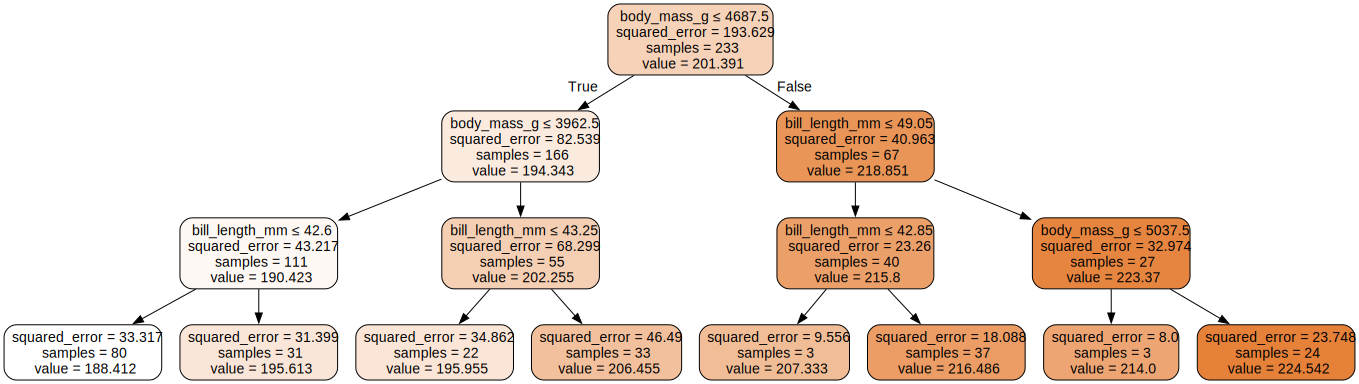

In [88]:
# create plot tree
plot_tree_regression(dt_regression, features)

In [89]:
# model evaluation
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.flipper_length_mm)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.flipper_length_mm)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 5.571134582740737
RMSE on test set 6.461255739037631


c:\Users\liama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\liama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Conclusion

- **Depth and Features**: The decision tree was created with a maximum depth of 3, and the features used were `bill_length_mm` and `body_mass_g`. These features were selected to predict the `flipper_length_mm`.

- **RMSE Calculation**: 
  - The RMSE for the training set predictions is approximately **5.57**.
  - The RMSE for the test set predictions is approximately **6.46**.

- **RMSE Difference**: The RMSE for the test set is slightly higher than the training set. This difference is expected due to the model's generalization to unseen data. The small difference indicates that the model is not overfitting and performs reasonably well on both the training and test sets.

- **Decision Tree Analysis**: Using the `plot_tree_regression` function, the decision tree was visualized. The tree is interpretable, with splits based on the selected features (`bill_length_mm` and `body_mass_g`). Each node represents a decision boundary, and the tree's structure provides insight into how the model predicts `flipper_length_mm`. The tree's depth of 3 ensures simplicity while maintaining predictive power.

Overall, the model demonstrates a good balance between complexity and performance, with reasonable RMSE values and an interpretable decision tree. Further tuning of hyperparameters or feature selection could improve the model's performance.